In [1]:
import os
import random
import numpy as np
import sktime
import seaborn
import pandas as pd
from sktime.datasets import load_from_arff_to_dataframe


In [2]:
PEMS_SF_DATA_PATH = "./PEMS-SF"
PEMS_SF_CLASSES_CATEGORY = "Day of the week"
PEMS_SF_CLASS_VALUES_MAPPER = {
    "1.0" : "Monday",
    "2.0" : "Tuesday",
    "3.0" : "Wednesday",
    "4.0" : "Thursday",
    "5.0" : "Friday",
    "6.0" : "Saturday",
    "7.0" : "Sunday",
}

train_x_pems_sf, train_y_pems_sf = load_from_arff_to_dataframe(
    os.path.join(PEMS_SF_DATA_PATH, "PEMS-SF_TRAIN.arff")
)
test_x_pems_sf, test_y_pems_sf = load_from_arff_to_dataframe(
    os.path.join(PEMS_SF_DATA_PATH, "PEMS-SF_TEST.arff")
)

/home/samanu/.local/lib/python3.8/site-packages/sktime/datasets/_data_io.py:1108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  x_data["dim_" + str(dim)] = instance_list[dim]


In [3]:
U_WAVE_GESTURE_DATA_PATH = "./UWaveGestureLibrary"
U_WAVE_CLASSES_CATEGORY = "Gesture"
U_WAVE_GESTURE_CLASS_VALUES_MAPPER = {
    "1.0" : "Gesture 1",
    "2.0" : "Gesture 2",
    "3.0" : "Gesture 3",
    "4.0" : "Gesture 4",
    "5.0" : "Gesture 5",
    "6.0" : "Gesture 6",
    "7.0" : "Gesture 7",
    "8.0" : "Gesture 8",
}

train_x_u_wave_gesture, train_y_u_wave_gesture = load_from_arff_to_dataframe(
    os.path.join(U_WAVE_GESTURE_DATA_PATH, "UWaveGestureLibrary_TRAIN.arff")
)
test_x_u_wave_gesture, test_y_u_wave_gesture = load_from_arff_to_dataframe(
    os.path.join(U_WAVE_GESTURE_DATA_PATH, "UWaveGestureLibrary_TEST.arff")
)

# #1 Exploratory Data Analysis

### #1.1 Class Equilibrium

In [4]:
def draw_class_equilibrium(y:np.array, class_labels, classes_category, count_label, title) -> None: 
    y_dataframe = pd.DataFrame(data = y, columns=[classes_category])
    y_dataframe[count_label] = 0
    y_dataframe = y_dataframe.groupby(classes_category, as_index=False).count()
    y_dataframe.reset_index()
    
    for class_label_key in class_labels:
        class_label_value = class_labels[class_label_key]
        y_dataframe.loc[y_dataframe[classes_category] == class_label_key, classes_category] = class_label_value
    
    y_dataframe.plot.bar(x = classes_category, y = count_label, title=title)

##### #1.1.1 PEMS-SF
Some days of the weeks were skipped due to holidays or technical issues but the distribution wasn't changed so much.
<br/>
Count of classified days are somewhat similar.

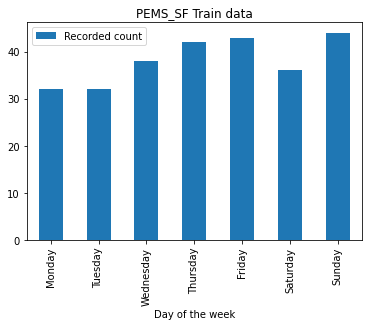

In [5]:
draw_class_equilibrium(train_y_pems_sf, PEMS_SF_CLASS_VALUES_MAPPER, PEMS_SF_CLASSES_CATEGORY, "Recorded count", "PEMS_SF Train data")

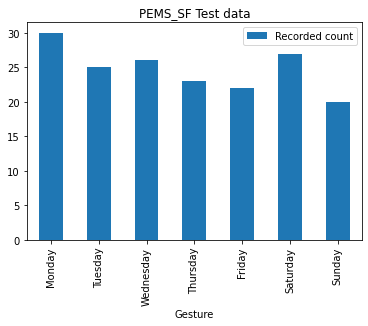

In [6]:
draw_class_equilibrium(test_y_pems_sf, PEMS_SF_CLASS_VALUES_MAPPER, U_WAVE_CLASSES_CATEGORY, "Recorded count", "PEMS_SF Test data")

##### #1.1.1 U_WAVE_GESTURE
This dataset is has an even class distribution both in train and test subsets.

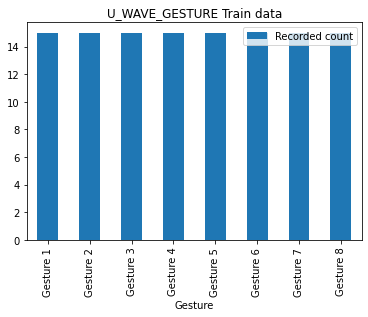

In [7]:
draw_class_equilibrium(train_y_u_wave_gesture, U_WAVE_GESTURE_CLASS_VALUES_MAPPER, U_WAVE_CLASSES_CATEGORY, "Recorded count", "U_WAVE_GESTURE Train data")

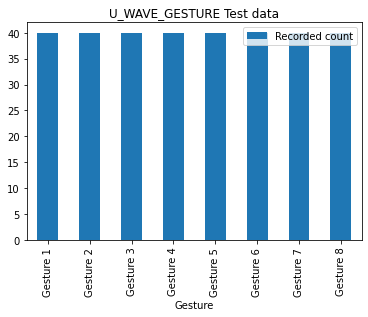

In [8]:
draw_class_equilibrium(test_y_u_wave_gesture, U_WAVE_GESTURE_CLASS_VALUES_MAPPER, U_WAVE_CLASSES_CATEGORY, "Recorded count", "U_WAVE_GESTURE Test data")


### #1.2 U Wave Gesture axis evolution

In [9]:
def combine_and_translate_classes(train_x: pd.DataFrame, train_y: np.array, class_labels: dict, classes_category: str) -> pd.DataFrame:
    y_dataframe = pd.DataFrame(data = train_y, columns=[classes_category])
    combined_data_frame =  pd.merge(train_x, y_dataframe, left_index=True, right_index=True, )
    for class_label_key in class_labels:
        class_label_value = class_labels[class_label_key]
        combined_data_frame.loc[combined_data_frame[classes_category] == class_label_key, classes_category] = class_label_value

    return combined_data_frame

##### #1.2.1 Random example for each gesture

In [10]:
combined_data_frame = combine_and_translate_classes(train_x_u_wave_gesture, train_y_u_wave_gesture, U_WAVE_GESTURE_CLASS_VALUES_MAPPER, U_WAVE_CLASSES_CATEGORY)

for class_label_key in U_WAVE_GESTURE_CLASS_VALUES_MAPPER.keys():
    class_label_value = U_WAVE_GESTURE_CLASS_VALUES_MAPPER[class_label_key]
    current_gesture_data_frame = combined_data_frame.loc[combined_data_frame[U_WAVE_CLASSES_CATEGORY] == class_label_value]
    number_of_rows = len(current_gesture_data_frame.index)
    chosen_index = random.randint(0, number_of_rows - 1)
    chosen_row =  current_gesture_data_frame.iloc[chosen_index]
    #TODO plot chosen row